<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1294776 entries, 0 to 1294775
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   user_id          1294776 non-null  int64  
 1   name             1294776 non-null  object 
 2   location         1294776 non-null  object 
 3   total_influence  1294776 non-null  float64
 4   country          1206625 non-null  object 
 5   event_type       1294776 non-null  object 
 6   event_action     1294776 non-null  object 
 7   event_time       1294776 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 79.0+ MB
None
#人口统计分析


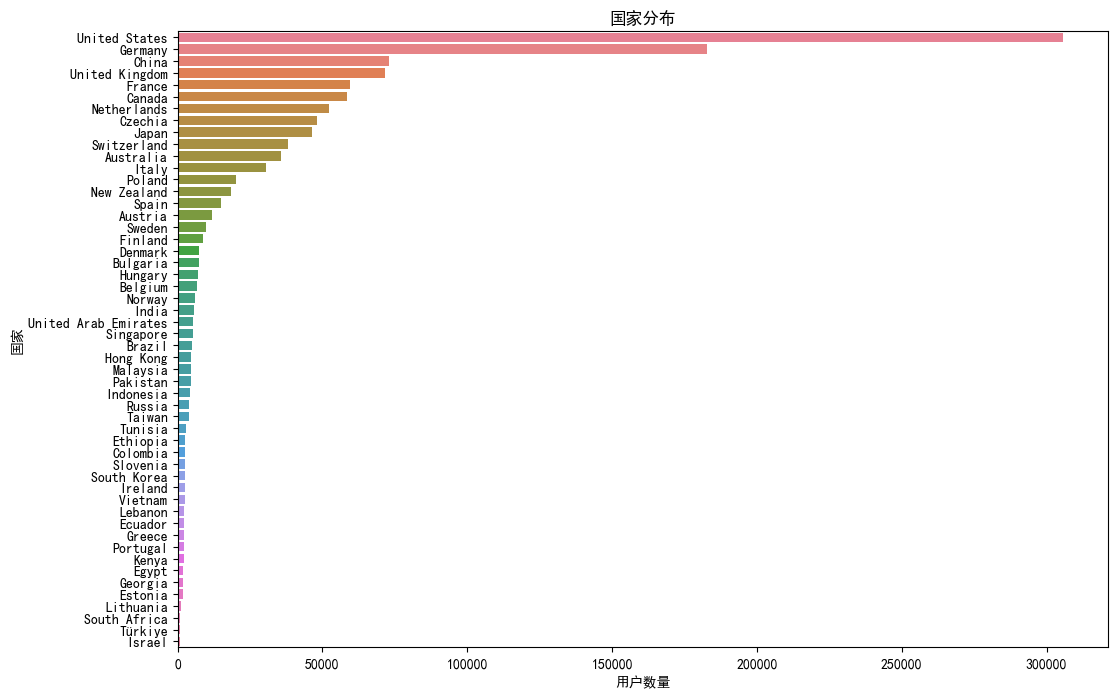

开发者主要国家是美国和德国，其次是中国和英国


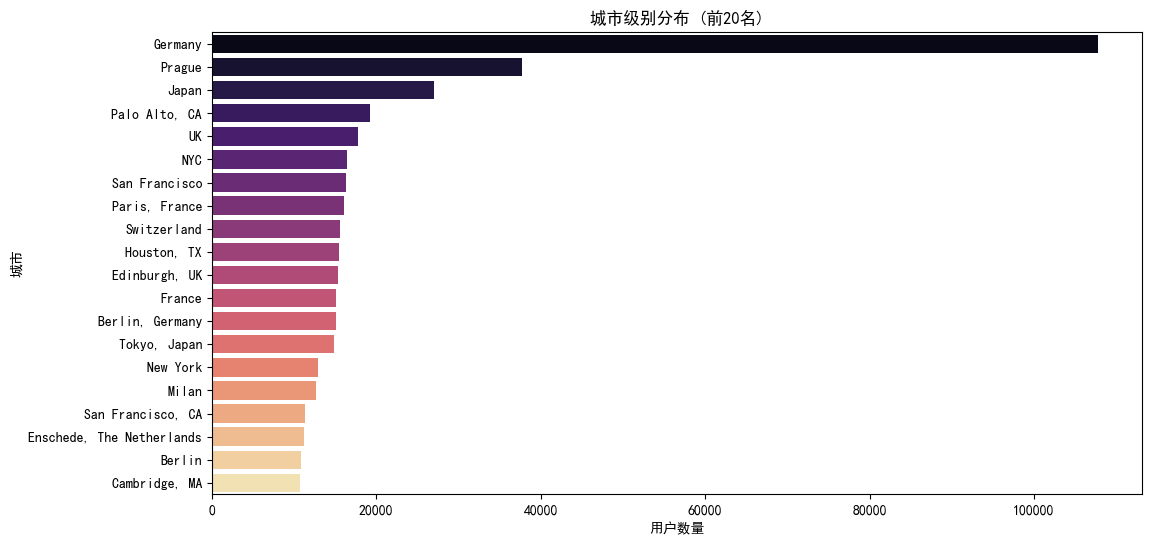

主要分布的location是布拉格和德国


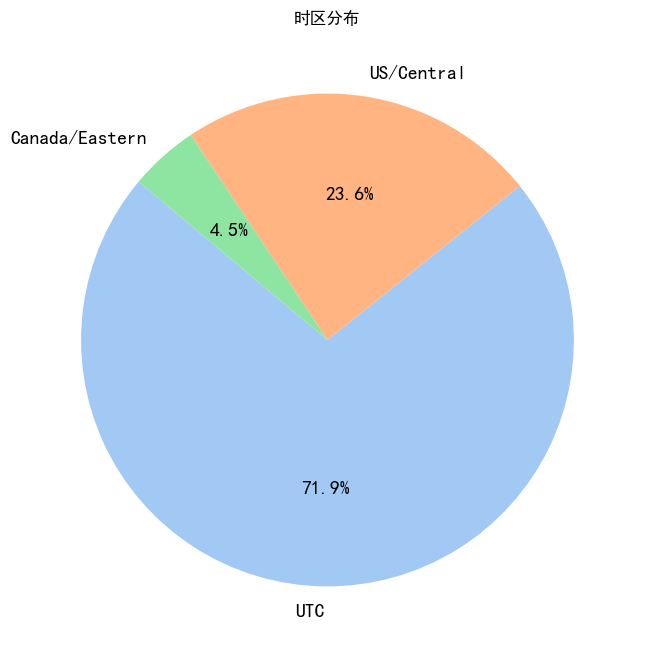

#协作行为分析


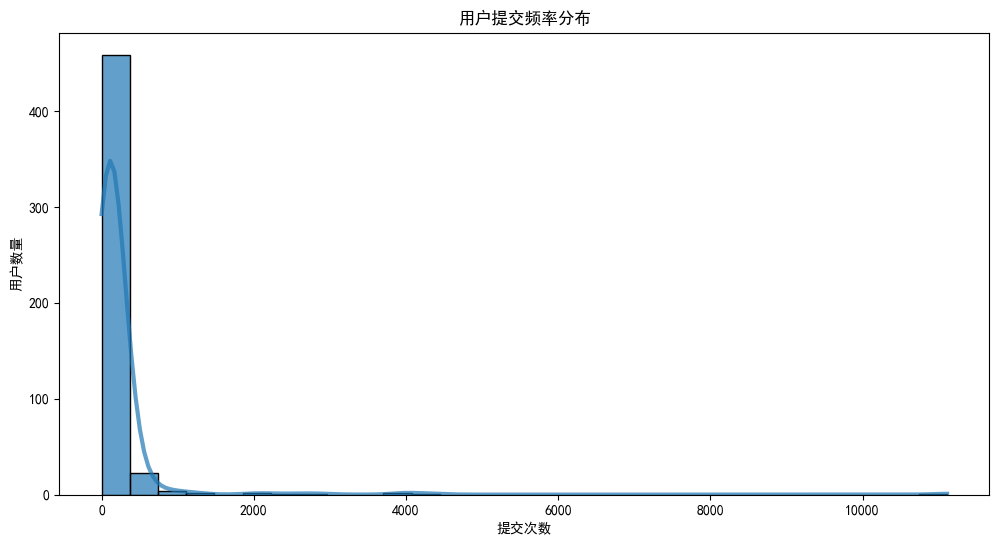

大部分的用户提交次数在0到400
#其他维度分析


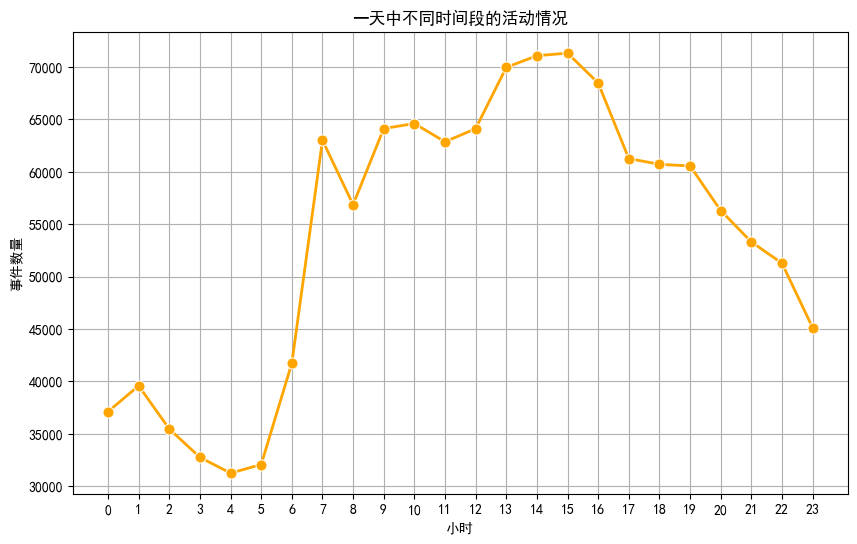

显然再凌晨零点到早上六点提交次数较少，说明大部分程序猿活动在白天
影响力描述性统计：
count    1.294776e+06
mean     5.440863e+02
std      2.578072e+02
min      3.385323e+02
25%      3.900486e+02
50%      4.552713e+02
75%      5.748544e+02
max      1.776967e+03
Name: total_influence, dtype: float64


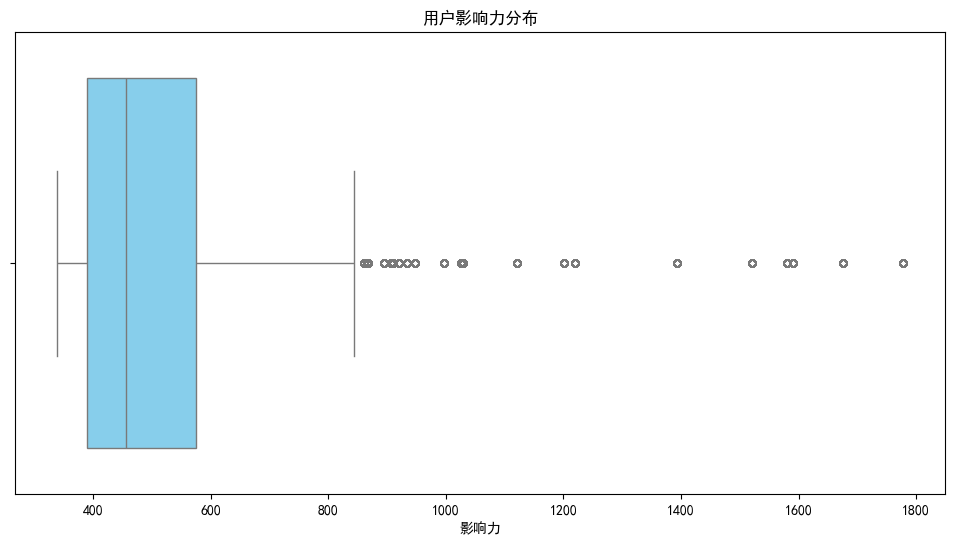

大多数用户影响力分布在400到600之间，并且中位数更偏向400。然而有许多的影响力十分高的值可能是异常值


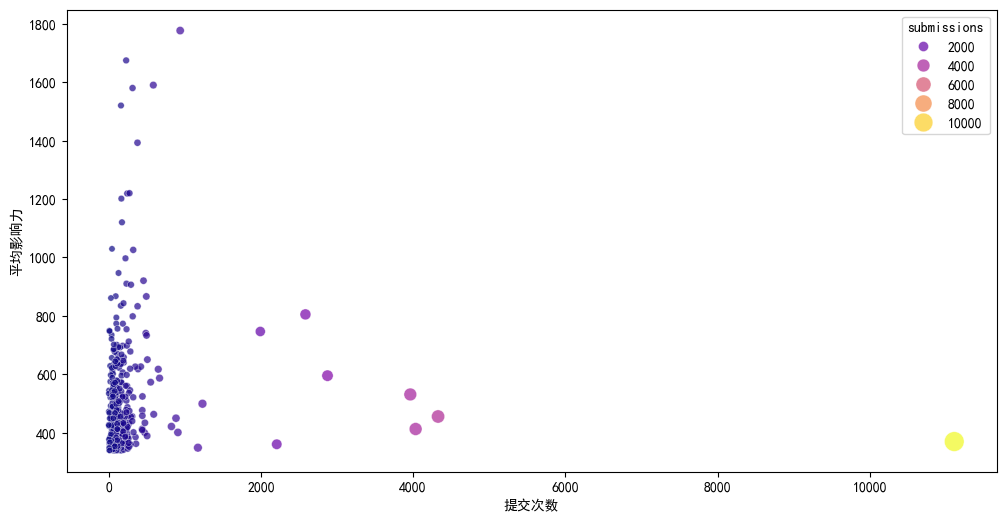

除了少部分数据外，大多数用户的提交次数和影响力是正相关的


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False  
df = pd.read_csv('users_combined_info_500.csv')
print(df.info())
print("#人口统计分析")
country_distribution = df['country'].value_counts()
country_distribution = country_distribution.reset_index()
country_distribution.columns = ['country', 'count']
# 绘制国家分布条形图
plt.figure(figsize=(12, 8))
plt.title('国家分布')
sns.barplot(
    x='count',
    y='country',  
    data=country_distribution,
    hue='country',  
    dodge=False,  
    legend=False  
)
plt.xlabel('用户数量')
plt.ylabel('国家')
plt.show()
print("开发者主要国家是美国和德国，其次是中国和英国")
# 分析城市级别的分布
city_distribution = df.groupby('location').size().sort_values(ascending=False)
top_cities = city_distribution[:20]
top_cities = top_cities.reset_index()
top_cities.columns = ['city', 'count']
colors = sns.color_palette("magma", n_colors=len(top_cities))
plt.figure(figsize=(12, 6))
plt.title('城市级别分布 (前20名)')
sns.barplot(
    x='count',
    y='city',
    data=top_cities,
    hue='city',
    palette=colors,
    dodge=False,
    legend=False
)

plt.xlabel('用户数量')
plt.ylabel('城市')
plt.show()
print("主要分布的location是布拉格和德国")
# 提取时区信息（简化处理，仅基于国家）
df['event_time'] = pd.to_datetime(df['event_time'])
def get_timezone(country):
    if country == 'United States':
        return 'US/Central' 
    elif country == 'Canada':
        return 'Canada/Eastern'
    else:
        return 'UTC'

df['timezone'] = df['country'].apply(get_timezone)
timezone_distribution = df['timezone'].value_counts()
plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')[0:5]
plt.pie(
    timezone_distribution, 
    labels=timezone_distribution.index, 
    autopct='%1.1f%%', 
    startangle=140,
    colors=colors, 
    textprops={'fontsize': 14})
plt.title('时区分布')
plt.show()
print("#协作行为分析")
# 绘制提交频率分布直方图
submission_frequency = df[df['event_type'] == 'CreateEvent'].groupby('user_id').size()
submission_frequency=submission_frequency.values
plt.figure(figsize=(12, 6))
sns.histplot(
    submission_frequency, 
    bins=30, 
    kde=True, 
    line_kws={"color": 'red', "lw": 3,"alpha": 0.7},
    alpha=0.7, 
    edgecolor='black'
    
)
plt.title('用户提交频率分布')
plt.xlabel('提交次数')
plt.ylabel('用户数量')
plt.show()
print("大部分的用户提交次数在0到400")
print("#其他维度分析")
# 绘制一天中活动时间分布折线图
hourly_activity = df['event_time'].dt.hour.value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.lineplot(
    x=hourly_activity.index, 
    y=hourly_activity.values, 
    marker='o', 
    markersize=8, 
    linewidth=2, 
    color='orange'
)
plt.title('一天中不同时间段的活动情况')
plt.xlabel('小时')
plt.ylabel('事件数量')
plt.xticks(range(24))
plt.grid(True)
plt.show()
print("显然再凌晨零点到早上六点提交次数较少，说明大部分程序猿活动在白天")
# 绘制影响力分布箱线图
influence_distribution = df['total_influence'].describe()
print("影响力描述性统计：")
print(influence_distribution)
plt.figure(figsize=(12, 6))
sns.boxplot(
    x=df['total_influence'], 
    color='lightblue', 
    fliersize=5, 
    boxprops=dict(facecolor='skyblue')
)
plt.title('用户影响力分布')
plt.xlabel('影响力')
plt.show()
print("大多数用户影响力分布在400到600之间，并且中位数更偏向400。然而有许多的影响力十分高的值可能是异常值")
# 影响力与提交次数的关系
influence_vs_submissions = df[df['event_type'] == 'CreateEvent'].groupby('user_id').agg({'total_influence': 'mean', 'event_type': 'count'}).rename(columns={'event_type': 'submissions'})
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=influence_vs_submissions, 
    x='submissions', 
    y='total_influence', 
    alpha=0.7, 
    size='submissions', 
    sizes=(20, 200), 
    hue='submissions', 
    palette='plasma'
)
plt.xlabel('提交次数')
plt.ylabel('平均影响力')
plt.show()
print("除了少部分数据外，大多数用户的提交次数和影响力是正相关的")